## Data Science and Business Analytics Internship
## Task 4: Exploratory Data Analysis - Terrorism
## Author: Ahmed Mohammed 



### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading dataset

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
df.shape

(181691, 135)

### Rename and remove unnecessary columns

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill','nwound':'Wound','target1':'Target'},inplace=True)

df = df[['Year','Month','Day','Country','State','Region','City',"Attacktype",'kill',
               'Wound','Target','Group','Targettype','Weapon',]]
df.head()

,Year,Month,Day,Country,State,Region,City,Attacktype,kill,Wound,Target,Group,Targettype,Weapon
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [6]:
df.shape

(181691, 14)

### Checking for dtypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   Attacktype  181691 non-null  object 
 8   kill        171378 non-null  float64
 9   Wound       165380 non-null  float64
 10  Target      181055 non-null  object 
 11  Group       181691 non-null  object 
 12  Targettype  181691 non-null  object 
 13  Weapon      181691 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 19.4+ MB


### Checking for null values

In [8]:
df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
State           421
Region            0
City            434
Attacktype        0
kill          10313
Wound         16311
Target          636
Group             0
Targettype        0
Weapon            0
dtype: int64

### Filling missing values 

In [9]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)

### Create new coulmn

In [10]:
df['Casualities'] = df['kill'] + df['Wound']

### Checkcking for null values after filling values and adding new column

In [11]:
df.isnull().sum()

Year             0
Month            0
Day              0
Country          0
State          421
Region           0
City           434
Attacktype       0
kill             0
Wound            0
Target         636
Group            0
Targettype       0
Weapon           0
Casualities      0
dtype: int64

### Statistical Summary

In [12]:
df.describe()

,Year,Month,Day,kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000


In [13]:
corr = df.corr()
corr

,Year,Month,Day,kill,Wound,Casualities
Year,1.000000,0.000139,0.018254,0.021252,0.017484,0.020675
Month,0.000139,1.000000,0.005497,0.004031,0.003178,0.003805
Day,0.018254,0.005497,1.000000,-0.003225,-0.001082,-0.001808
kill,0.021252,0.004031,-0.003225,1.000000,0.443326,0.651885
Wound,0.017484,0.003178,-0.001082,0.443326,1.000000,0.968724
Casualities,0.020675,0.003805,-0.001808,0.651885,0.968724,1.000000


## Exploratory Data Analysis 

### Correlation between variables

<AxesSubplot:>

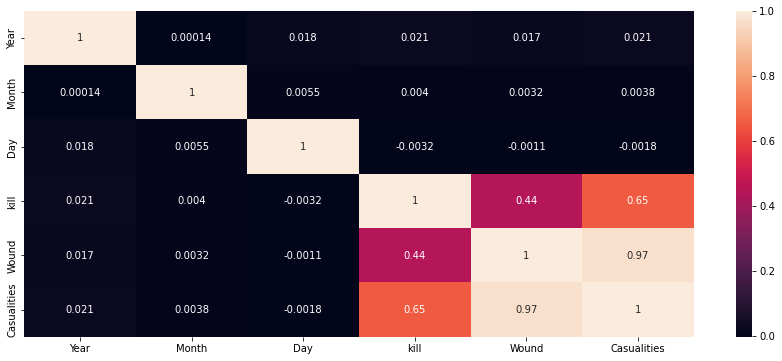

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(corr.iloc[:15,:15], annot=True)

### Worst 20 terrorism attacks

In [15]:
worst_20terror_attacks = df.sort_values(by='Casualities',ascending=False)[:20]

heat = worst_20terror_attacks.pivot_table(index='Country',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)

heat

Year,1982,1984,1992,1994,1995,1996,1998,2001,2004,2006,2007,2008,2014,2016,2017
Country,,,,,,,,,,,,,,,
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1261.5,1503.0,0.0
Japan,0.0,0.0,0.0,0.0,5513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kenya,0.0,0.0,0.0,0.0,0.0,0.0,4224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1071.0,0.0,0.0,0.0,0.0,0.0,0.0
Rwanda,0.0,0.0,0.0,1180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Somalia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,904.0


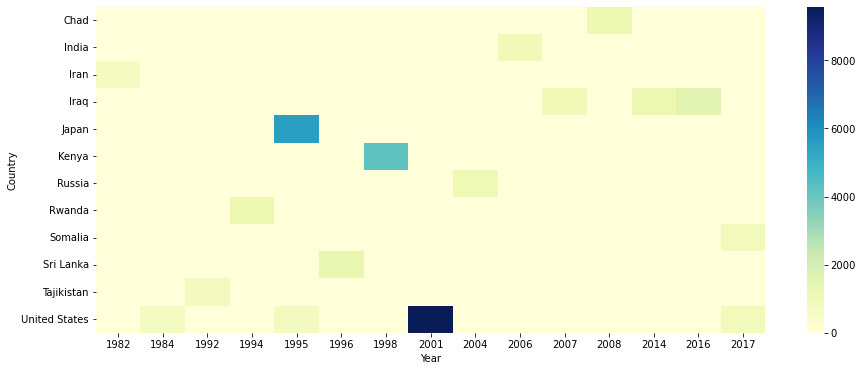

In [16]:
plt.figure(figsize = (15,6))
ax = sns.heatmap(heat, cmap="YlGnBu")

### Number of Terrorist Attacks vs Number of Casualities From 1970 to 2017

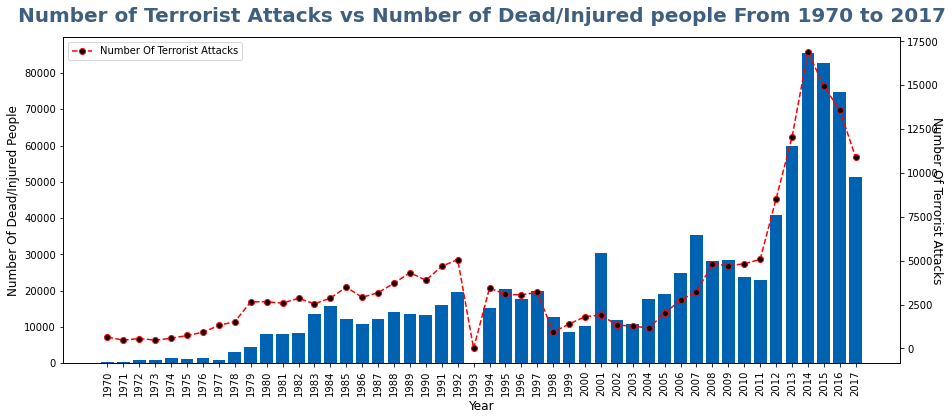

In [17]:
people_damage = df[["Year","Casualities"]].groupby('Year').sum()
list_year =  df["Year"].unique().tolist()

fig, ax1 = plt.subplots(figsize = (15,6))
ax1.bar(people_damage.index, [i[0] for i in people_damage.values], color= '#0063B1' )

ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)
ax1.set_ylabel('Number Of Dead/Injured People', size = 12)
ax1.set_xlabel('Year', size = 12)
ax1.set_title('Number of Terrorist Attacks vs Number of Dead/Injured people From 1970 to 2017', fontsize= 20, pad= 15, weight ='bold', 
                    color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
ax2 = ax1.twinx()

number_attack = []
for year in list_year:
    number_attack.append(len(df[df['Year'] == year][["Year"]]))
number_attack.insert(23, 0)

ax2.set_ylabel('Number Of Terrorist Attacks', size = 12,rotation=-90)
ax2.plot(range(1970, 2018), number_attack, 'r--o', mfc='k', label='Number Of Terrorist Attacks')

plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()

### Attacks in Years

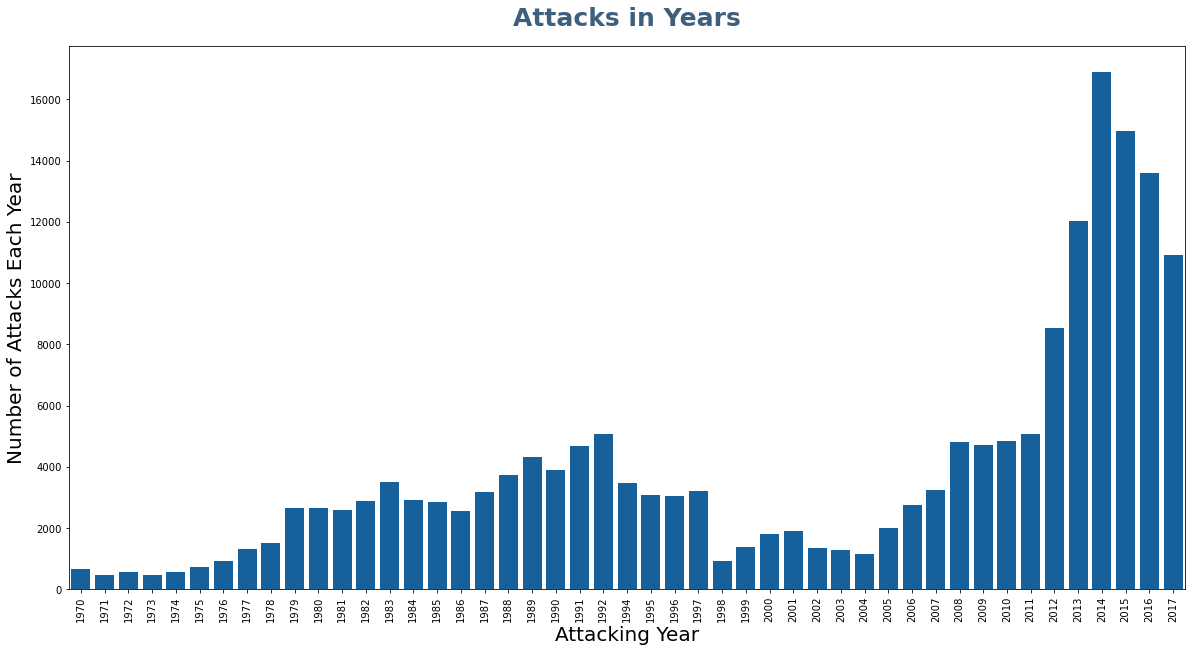

In [18]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()

plt.figure(figsize= (20, 10))
sns.barplot(x= year, y = years_count, color = '#0063B1')

plt.xticks(rotation = 90)
plt.xlabel('Attacking Year', fontsize = 20)
plt.ylabel('Number of Attacks Each Year', fontsize = 20)
plt.title('Attacks in Years', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 
plt.show()

### Attack in Months

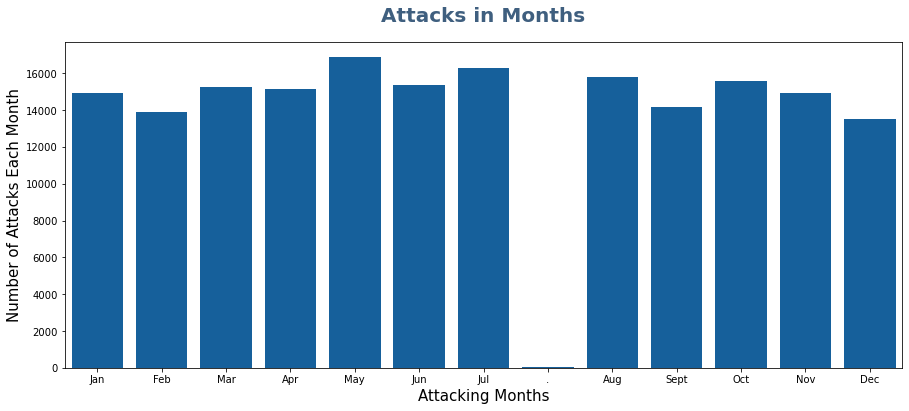

In [19]:
Month = df['Month'].unique()
Months_count = df['Month'].value_counts(dropna = False).sort_index()
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
labels= ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", ".", "Aug", "Sept", "Oct", "Nov", "Dec" )

plt.figure(figsize= (15, 6))
sns.barplot(x= Month, y = Months_count, color = '#0063B1')

plt.xticks(positions, labels, fontsize=10, rotation = 0)

plt.xlabel('Attacking Months', fontsize = 15)
plt.ylabel('Number of Attacks Each Month', fontsize = 15)
plt.title('Attacks in Months', fontsize= 20, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 
plt.show()

### Weapon types

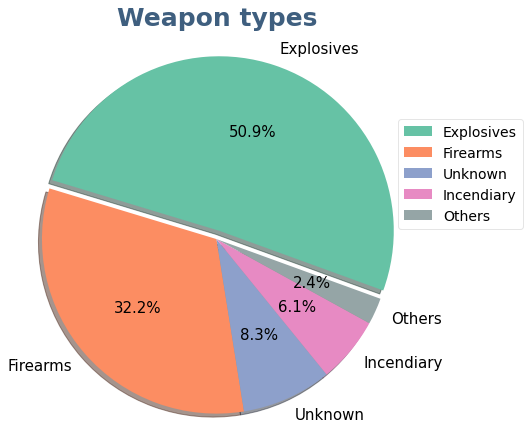

In [20]:
weaptype_filtered =df['Weapon'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown',
                                                               'Incendiary'] else 'Others')
weaptype = weaptype_filtered.value_counts().tolist()

weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']

weap_sizes = []

for j in weaptype:
    percent = j*100/len(df['Weapon'])
    weap_sizes.append(percent)

fig, ax = plt.subplots(figsize=(7,7))
patches, texts, autotexts = ax.pie(weap_sizes, labels=weap_labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:4:1]+
                                   [(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Weapon types', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 

ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.2,0.5,0.1,1), prop={'size': 14})
fig.show()

### Top 10 Attacked Countries From 2000 To 2017

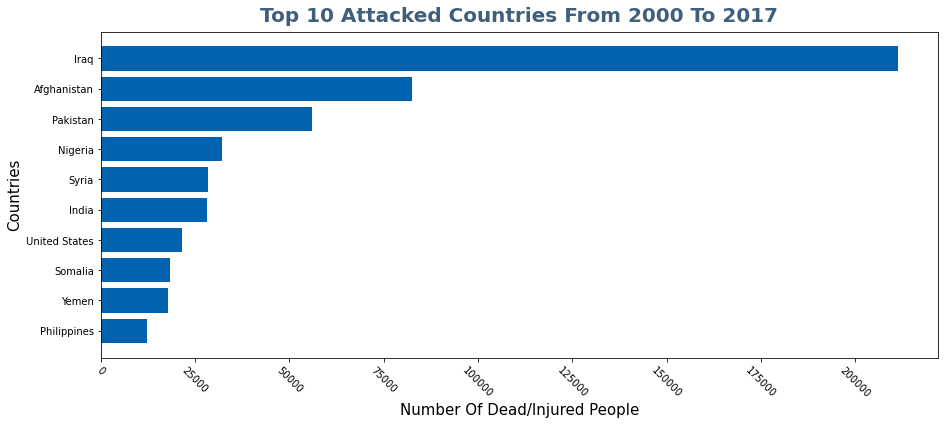

In [21]:
country_damage = df[df['Year'] > 1999][["Country", "Casualities"]].groupby('Country',as_index=False).sum()
df_paint = country_damage.sort_values(by='Casualities', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(15, 6))
ax.barh(df_paint["Country"][::-1], df_paint["Casualities"][::-1], color = '#0063B1')
plt.xticks(rotation=-45)
ax.set_ylabel('Countries', size=15)
ax.set_xlabel('Number Of Dead/Injured People', size=15)
plt.title("Top 10 Attacked Countries From 2000 To 2017", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()

### Top 10 Attacked Cites From 2000 To 2017

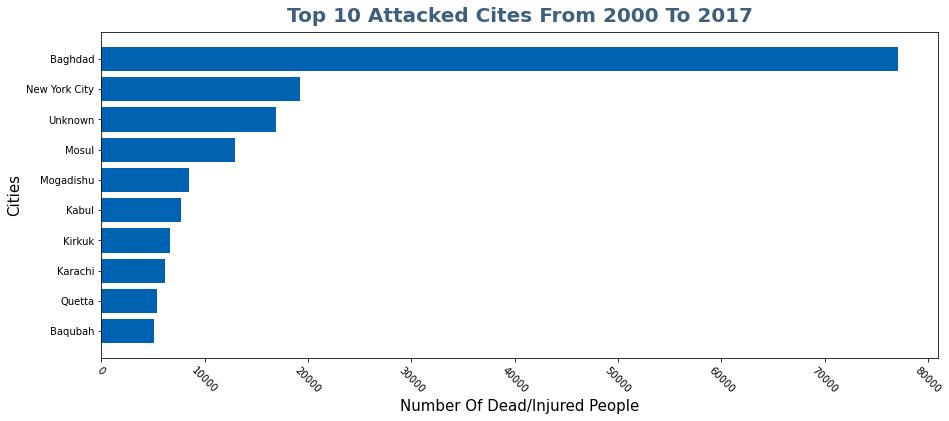

In [22]:
country_damage = df[df['Year'] > 1999][["City", "Casualities"]].groupby('City',as_index=False).sum()
df_paint = country_damage.sort_values(by='Casualities', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(15, 6))
ax.barh(df_paint["City"][::-1], df_paint["Casualities"][::-1], color = '#0063B1')
plt.xticks(rotation=-45)
ax.set_ylabel('Cities', size=15)
ax.set_xlabel('Number Of Dead/Injured People', size=15)
plt.title("Top 10 Attacked Cites From 2000 To 2017", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()

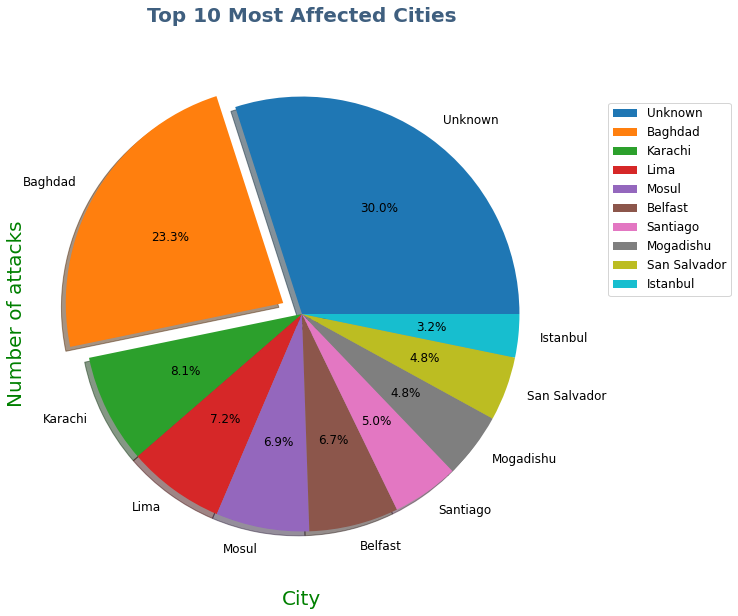

In [23]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
df['City'].value_counts().to_frame().sort_values('City', axis=0, ascending= False).head(10).plot(kind= 'pie',subplots=True, explode = explode,figsize=(10,10), shadow=True, textprops={'fontsize':12,'weight':'light','color':'k'},autopct='%1.1f%%')

plt.xticks(rotation = 50)
plt.xlabel('City', fontsize=20, c='g')
plt.ylabel('Number of attacks', fontsize= 20, c= 'g')
plt.title('Top 10 Most Affected Cities', fontsize= 20, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.legend(loc='upper right', bbox_to_anchor =(1.3,0.9), fontsize=12) 
plt.show()

### Region-wise attacks

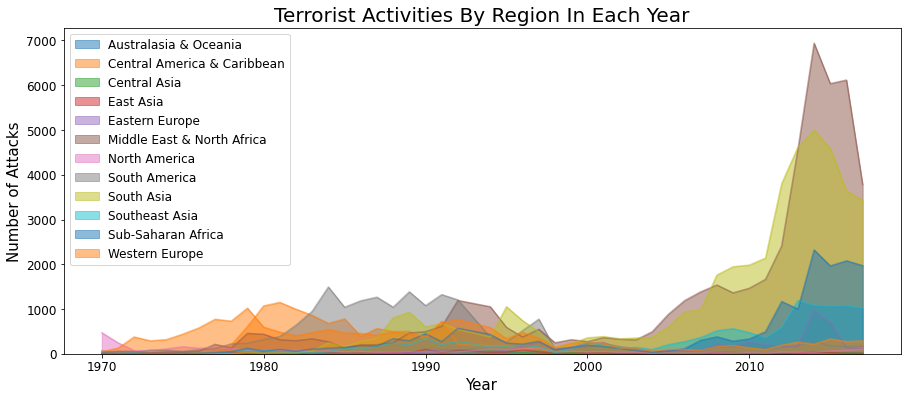

In [24]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(15,6))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Terrorist Activities By Region In Each Year',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.legend(loc='upper left', fontsize=12)
plt.show()

### Top 10 terrorist group attack

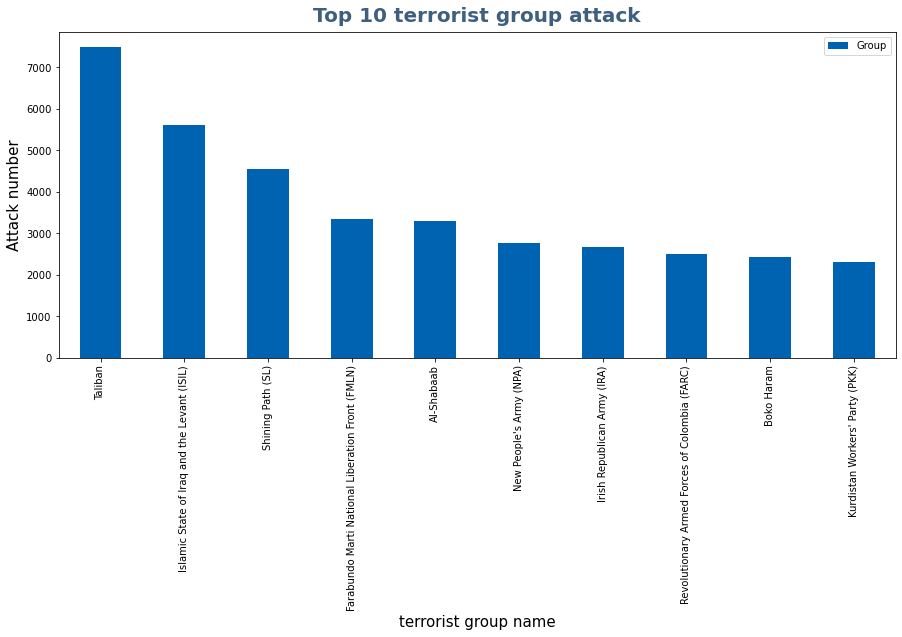

In [25]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='#0063B1',figsize=(15,6))
plt.title("Top 10 terrorist group attack", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

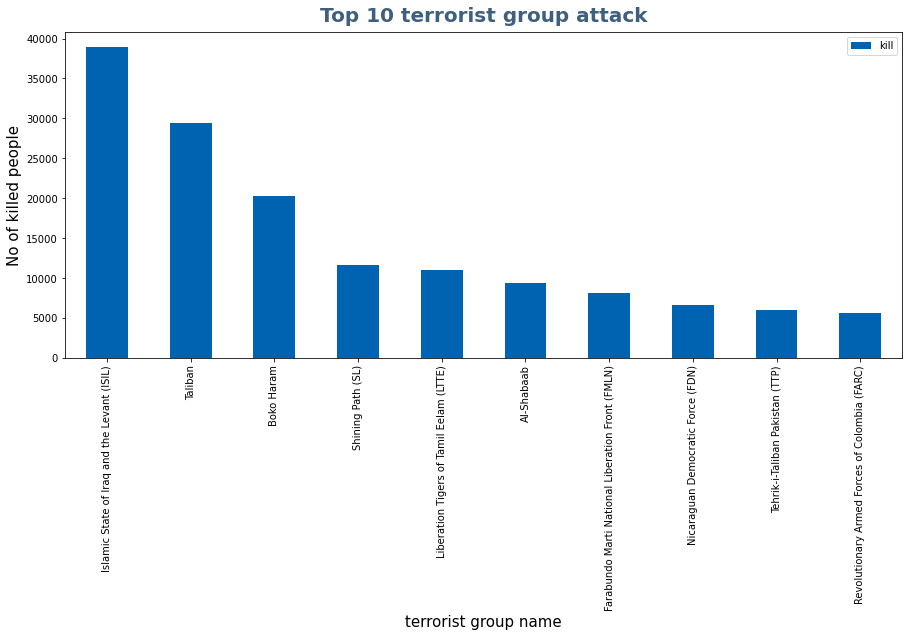

In [26]:
df[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='#0063B1',figsize=(15,6))
plt.title("Top 10 terrorist group attack", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

### People Died Due to Attack

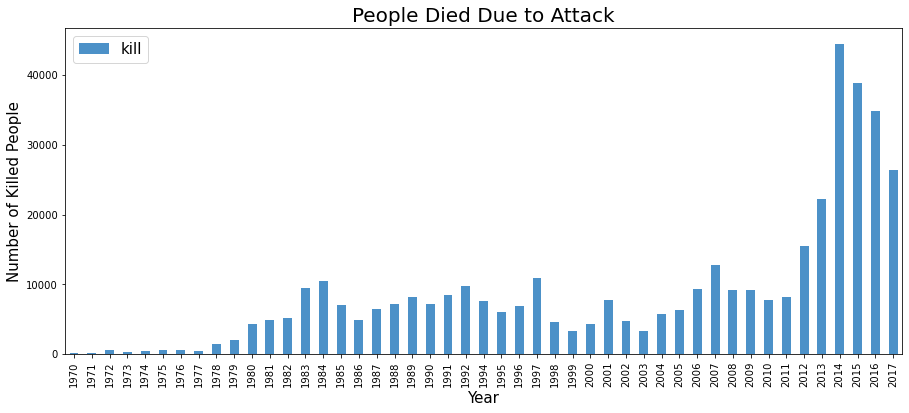

In [27]:
dafr = df[['Year', 'kill']].groupby(['Year']).sum()

dafr.plot(kind= 'bar',alpha=0.7,color='#0063B1', figsize= (15,6))
plt.title('People Died Due to Attack', fontsize = 20)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Number of Killed People', fontsize = 15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

### Attack Per Areas

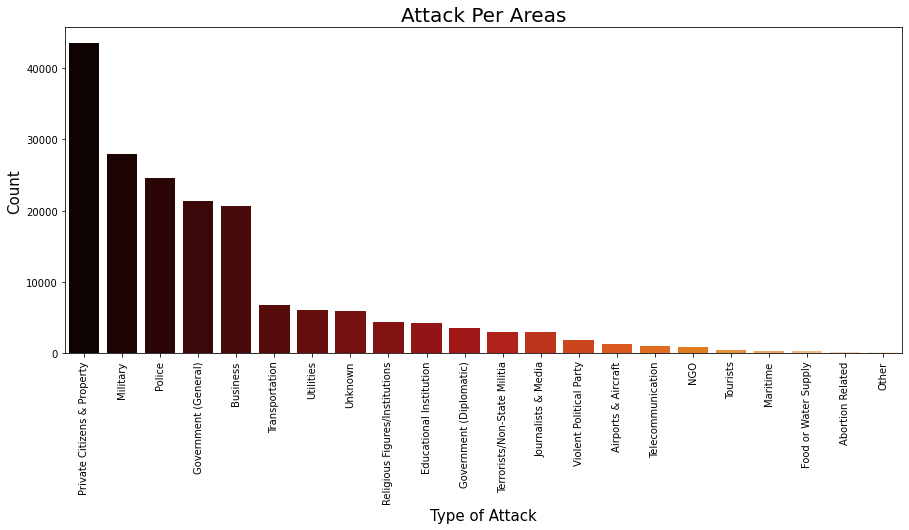

In [28]:
plt.figure(figsize=(15, 6))
sns.countplot(df.Targettype, order= df.Targettype.value_counts().index, palette="gist_heat")

plt.xticks(rotation= 90)
plt.xlabel('Type of Attack', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title('Attack Per Areas', fontsize= 20)

plt.show()

### Conclusion

In [29]:
print("Country with the most attacks:", df['Country'].value_counts().idxmax(),"(",max(df['Country'].value_counts()),"attacks)")
print("city with the most attacks:", df['City'].value_counts().index[1],"(",df['City'].value_counts()[1],"attacks)")
print("Region with the most attacks:", df['Region'].value_counts().idxmax(),"(",max(df['Region'].value_counts()),"attacks)")
print("Year with the most attacks:", df['Year'].value_counts().idxmax(),"(",max(df['Year'].value_counts()),"attacks)")
print("Month with the most attacks:", df['Month'].value_counts().idxmax(),"(",max(df['Month'].value_counts()),"attacks)")
print("Group with the most attacks:", df['Group'].value_counts().index[1],"(",df['Group'].value_counts()[1],"attacks)")
print("Most Attack Types:", df['Attacktype'].value_counts().idxmax(),"(",max(df['Attacktype'].value_counts()),"attacks)")

Country with the most attacks: Iraq ( 24636 attacks)
city with the most attacks: Baghdad ( 7589 attacks)
Region with the most attacks: Middle East & North Africa ( 50474 attacks)
Year with the most attacks: 2014 ( 16903 attacks)
Month with the most attacks: 5 ( 16875 attacks)
Group with the most attacks: Taliban ( 7478 attacks)
Most Attack Types: Bombing/Explosion ( 88255 attacks)
